In [129]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

# load the data
data = pd.read_csv('/Users/anthony/Desktop/INTONE/Time series(VPN)/Cisco Meraki Logs[22]/network_events_202211181302.csv')


data = data.loc[(data['type'] == 'cf_block') | (data['type'] == 'nbar_block') | (data['type'] == 'sf_url_block')]  
data.head()  


/var/folders/p2/05zzb9jx10x6f3chs84fjng80000gn/T/ipykernel_58408/3160089737.py:8: DtypeWarning: Columns (7,8,10,12,14,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/Users/anthony/Desktop/INTONE/Time series(VPN)/Cisco Meraki Logs[22]/network_events_202211181302.csv')


,networkId,type,description,clientId,clientDescription,deviceSerial,deviceName,eventData_url,eventData_server,eventData_categories,eventData_Source_IP,eventData_Source_Port,eventData_Destination_IP,eventData_Destination_Port,eventData_Protocol,eventData_NBAR_ID,eventData_Classification,eventData_Layer_7_firewall_rule,occurredAt
0,N_667095694804410110,cf_block,Content filtering blocked URL,k4f2fee,Android,Q2PN-AH88-6CK7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-01T13:23:50.824400Z
1,N_667095694804410110,cf_block,Content filtering blocked URL,k4f2fee,Android,Q2PN-AH88-6CK7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-01T13:23:50.738445Z
2,N_667095694804410110,cf_block,Content filtering blocked URL,k4f2fee,Android,Q2PN-AH88-6CK7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-01T13:23:50.585648Z
3,N_667095694804410110,cf_block,Content filtering blocked URL,k4f2fee,Android,Q2PN-AH88-6CK7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-01T13:23:50.571098Z
4,N_667095694804410110,cf_block,Content filtering blocked URL,k4f2fee,Android,Q2PN-AH88-6CK7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-01T13:23:50.004072Z


In [132]:
# encode categorical variables
le = LabelEncoder()
data['type'] = le.fit_transform(data['type'])
data['clientDescription'] = le.fit_transform(data['clientDescription'])
data.head()

,networkId,type,description,clientId,clientDescription,deviceSerial,deviceName,eventData_url,eventData_server,eventData_categories,eventData_Source_IP,eventData_Source_Port,eventData_Destination_IP,eventData_Destination_Port,eventData_Protocol,eventData_NBAR_ID,eventData_Classification,eventData_Layer_7_firewall_rule,occurredAt
0,N_667095694804410110,0,Content filtering blocked URL,k4f2fee,39,Q2PN-AH88-6CK7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-01T13:23:50.824400Z
1,N_667095694804410110,0,Content filtering blocked URL,k4f2fee,39,Q2PN-AH88-6CK7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-01T13:23:50.738445Z
2,N_667095694804410110,0,Content filtering blocked URL,k4f2fee,39,Q2PN-AH88-6CK7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-01T13:23:50.585648Z
3,N_667095694804410110,0,Content filtering blocked URL,k4f2fee,39,Q2PN-AH88-6CK7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-01T13:23:50.571098Z
4,N_667095694804410110,0,Content filtering blocked URL,k4f2fee,39,Q2PN-AH88-6CK7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-01T13:23:50.004072Z


In [133]:
# extract features
features = data.groupby(['clientDescription', 'eventData_Protocol'])['type'].value_counts().unstack().fillna(0).reset_index()
X = features.drop(['clientDescription', 'eventData_Protocol'], axis=1)
y = features['eventData_Protocol']


In [134]:
# spliting of the  the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [135]:

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [136]:
# evaluate the model
y_pred = clf.predict(X_test)

In [137]:
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='weighted'))
print('Recall:', recall_score(y_test, y_pred, average='weighted'))

Accuracy: 0.42857142857142855
Precision: 0.8095238095238095
Recall: 0.42857142857142855


In [138]:
# # load new data
# new_data = pd.read_csv('/Users/anthony/Desktop/INTONE/Time series(VPN)/Cisco Meraki Logs[22]/network_events_202211181302.csv')

# # encode categorical variables
# new_data['type'] = le.transform(new_data['type'])
# new_data['clientDescription'] = le.transform(new_data['clientDescription'])

# # extract features
# new_features = new_data.groupby(['clientId', 'deviceSerial'])['type'].value_counts().unstack().fillna(0).reset_index()
# X_new = new_features.drop(['clientId', 'deviceSerial'], axis=1)

# # make predictions
# y_new_pred = clf.predict(X_new)

# analyze predicted device serial numbers
trends = pd.DataFrame({'protocol': y_pred}).value_counts().reset_index()
trends.columns = ['protocol', 'count']
print(trends)


  protocol  count
0      UDP      6
1      TCP      1


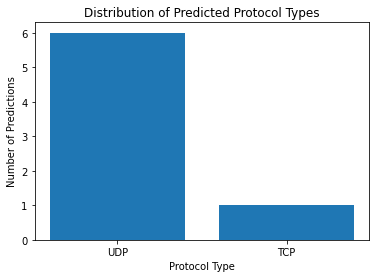

In [139]:
import matplotlib.pyplot as plt

# plot bar chart of predicted device serial numbers
plt.bar(trends['protocol'], trends['count'])
plt.xlabel('Protocol Type')
plt.ylabel('Number of Predictions')
plt.title('Distribution of Predicted Protocol Types')
plt.show()

# Just testing things out 👇


In [105]:
newdata = pd.read_csv('/Users/anthony/Desktop/INTONE/Time series(VPN)/Cisco Meraki Logs[22]/network_events_202211181302.csv')
newdata

/var/folders/p2/05zzb9jx10x6f3chs84fjng80000gn/T/ipykernel_58408/3485342741.py:1: DtypeWarning: Columns (7,8,10,12,14,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  newdata = pd.read_csv('/Users/anthony/Desktop/INTONE/Time series(VPN)/Cisco Meraki Logs[22]/network_events_202211181302.csv')


,networkId,type,description,clientId,clientDescription,deviceSerial,deviceName,eventData_url,eventData_server,eventData_categories,eventData_Source_IP,eventData_Source_Port,eventData_Destination_IP,eventData_Destination_Port,eventData_Protocol,eventData_NBAR_ID,eventData_Classification,eventData_Layer_7_firewall_rule,occurredAt
0,N_667095694804410110,cf_block,Content filtering blocked URL,k4f2fee,Android,Q2PN-AH88-6CK7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-01T13:23:50.824400Z
1,N_667095694804410110,cf_block,Content filtering blocked URL,k4f2fee,Android,Q2PN-AH88-6CK7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-01T13:23:50.738445Z
2,N_667095694804410110,cf_block,Content filtering blocked URL,k4f2fee,Android,Q2PN-AH88-6CK7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-01T13:23:50.585648Z
3,N_667095694804410110,cf_block,Content filtering blocked URL,k4f2fee,Android,Q2PN-AH88-6CK7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-01T13:23:50.571098Z
4,N_667095694804410110,cf_block,Content filtering blocked URL,k4f2fee,Android,Q2PN-AH88-6CK7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-01T13:23:50.004072Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436726,N_667095694804410110,cf_block,Content filtering blocked URL,ke5aef5,OPPO-F15,Q2PN-AH88-6CK7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-11-17T13:43:45.048598Z
436727,N_667095694804410110,cf_block,Content filtering blocked URL,ke5aef5,OPPO-F15,Q2PN-AH88-6CK7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-11-17T13:43:43.703109Z
436728,N_667095694804410110,nbar_block,Layer 7 firewall rule,ke5aef5,OPPO-F15,Q2PN-AH88-6CK7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-11-17T13:43:40.981057Z
436729,N_667095694804410110,nbar_block,Layer 7 firewall rule,ke5aef5,OPPO-F15,Q2PN-AH88-6CK7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-11-17T13:43:38.833534Z


In [106]:
newdata = newdata.drop(['networkId', 'description', 'clientId', 'clientDescription'], axis=1)
newdata

,type,deviceSerial,deviceName,eventData_url,eventData_server,eventData_categories,eventData_Source_IP,eventData_Source_Port,eventData_Destination_IP,eventData_Destination_Port,eventData_Protocol,eventData_NBAR_ID,eventData_Classification,eventData_Layer_7_firewall_rule,occurredAt
0,cf_block,Q2PN-AH88-6CK7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-01T13:23:50.824400Z
1,cf_block,Q2PN-AH88-6CK7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-01T13:23:50.738445Z
2,cf_block,Q2PN-AH88-6CK7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-01T13:23:50.585648Z
3,cf_block,Q2PN-AH88-6CK7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-01T13:23:50.571098Z
4,cf_block,Q2PN-AH88-6CK7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-01T13:23:50.004072Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436726,cf_block,Q2PN-AH88-6CK7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-11-17T13:43:45.048598Z
436727,cf_block,Q2PN-AH88-6CK7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-11-17T13:43:43.703109Z
436728,nbar_block,Q2PN-AH88-6CK7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-11-17T13:43:40.981057Z
436729,nbar_block,Q2PN-AH88-6CK7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-11-17T13:43:38.833534Z


In [107]:
newdata = pd.get_dummies(newdata, columns=['type'])
newdata

,deviceSerial,deviceName,eventData_url,eventData_server,eventData_categories,eventData_Source_IP,eventData_Source_Port,eventData_Destination_IP,eventData_Destination_Port,eventData_Protocol,...,type_client_vpn_connect,type_client_vpn_disconnect,type_dhcp_lease,type_dhcp_problem,type_dhcp_release,type_events_dropped2,type_ip_conflict,type_martian_vlan,type_nbar_block,type_vpn
0,Q2PN-AH88-6CK7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1,Q2PN-AH88-6CK7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2,Q2PN-AH88-6CK7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3,Q2PN-AH88-6CK7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
4,Q2PN-AH88-6CK7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436726,Q2PN-AH88-6CK7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
436727,Q2PN-AH88-6CK7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
436728,Q2PN-AH88-6CK7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
436729,Q2PN-AH88-6CK7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0


In [113]:
from sklearn.model_selection import train_test_split

X = data.drop(['2022-09-01T13:23:50.824400Z'], axis=1)
y = data['2022-09-01T13:23:50.824400Z']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


KeyError: "['2022-09-01T13:23:50.824400Z'] not found in axis"

In [112]:
y

0         2022-09-01T13:23:50.824400Z
1         2022-09-01T13:23:50.738445Z
2         2022-09-01T13:23:50.585648Z
3         2022-09-01T13:23:50.571098Z
4         2022-09-01T13:23:50.004072Z
                     ...             
436726    2022-11-17T13:43:45.048598Z
436727    2022-11-17T13:43:43.703109Z
436728    2022-11-17T13:43:40.981057Z
436729    2022-11-17T13:43:38.833534Z
436730    2022-11-17T13:43:37.029452Z
Name: occurredAt, Length: 436731, dtype: object

In [94]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)


ValueError: Input X contains NaN.
DecisionTreeClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [140]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# load the dataset
df = pd.read_csv('/Users/anthony/Desktop/INTONE/Time series(VPN)/Cisco Meraki Logs[22]/network_events_202211181302.csv')


# preprocess the data
# drop irrelevant columns
df = df.drop(['networkId', 'description', 'clientId', 'clientDescription', 'deviceSerial', 'deviceName', 'eventData_url', 'eventData_server', 'eventData_categories', 'eventData_Source_IP', 'eventData_Source_Port', 'eventData_Destination_IP', 'eventData_Destination_Port', 'eventData_Classification', 'eventData_Layer_7_firewall_rule', 'occurredAt'], axis=1)

# encode categorical variable
df = pd.get_dummies(df, columns=['type', 'eventData_Protocol'])

# split the dataset into training and test sets
X = df.drop(['eventData_Protocol'], axis=1)
y = df['eventData_Protocol']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train the model
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

# make predictions
y_pred = rfc.predict(X_test)

# evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


/var/folders/p2/05zzb9jx10x6f3chs84fjng80000gn/T/ipykernel_58408/2631075898.py:7: DtypeWarning: Columns (7,8,10,12,14,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/anthony/Desktop/INTONE/Time series(VPN)/Cisco Meraki Logs[22]/network_events_202211181302.csv')


KeyError: "['eventData_Protocol'] not found in axis"